# BERT

本教程主要演示了：

- 从本地加载 BERT 模型，这些模型已针对不同任务进行过培训，包括 MNLI，SQuAD 和 PubMed
- 使用匹配的预处理模型来标记原始文本并将其转换为 id
- 使用加载的模型从令牌输入 id 生成集合和序列输出
- 查看不同句子的合并输出的语义相似性

###### 注：本教程推荐使用GPU运行。

## 准备工作

In [1]:
! pip install -U tensorflow_text

import seaborn as sns
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 3.4 MB 409 kB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 49.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 6.8 MB/s eta 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


## 配置模型

In [2]:
BERT_MODEL = "./bert_model/"
# @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2",
#                         "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2",
#                         "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2",
#                         "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2",
#                         "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2",
#                         "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",
#                         "https://tfhub.dev/google/experts/bert/pubmed/2",
#                         "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# 预处理必须与模型匹配，但上面所有模型都使用相同的方法。
PREPROCESS_MODEL = "./preprocess_model/"

## 准备数据

In [3]:
sentences = [
  "Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.",
  "The album went straight to number one on the Norwegian album chart, and sold to double platinum.",
  "Among the singles released from the album were the songs \"Be My Lover\" and \"Hard To Stay Awake\".",
  "Riccardo Zegna is an Italian jazz musician.",
  "Rajko Maksimović is a composer, writer, and music pedagogue.",
  "One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.",
  "Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum",
  "A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.",
  "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth.",
]

## 运行模型

我们将从本地加载BERT模型，使用匹配的预处理模型对句子进行标记化，然后将标记化的句子输入到模型中。为了保证效率，我们建议在GPU上运行。

In [4]:
preprocess = hub.load(PREPROCESS_MODEL)
inputs = preprocess(sentences)

In [5]:
bert = hub.load(BERT_MODEL)
outputs = bert(inputs)

In [6]:
print("Sentences:")
print(sentences)

print("\nBERT inputs:")
print(inputs)

print("\nPooled embeddings:")
print(outputs["pooled_output"])

print("\nPer token embeddings:")
print(outputs["sequence_output"])

Sentences:
["Here We Go Then, You And I is a 1999 album by Norwegian pop artist Morten Abel. It was Abel's second CD as a solo artist.", 'The album went straight to number one on the Norwegian album chart, and sold to double platinum.', 'Among the singles released from the album were the songs "Be My Lover" and "Hard To Stay Awake".', 'Riccardo Zegna is an Italian jazz musician.', 'Rajko Maksimović is a composer, writer, and music pedagogue.', 'One of the most significant Serbian composers of our time, Maksimović has been and remains active in creating works for different ensembles.', 'Ceylon spinach is a common name for several plants and may refer to: Basella alba Talinum fruticosum', 'A solar eclipse occurs when the Moon passes between Earth and the Sun, thereby totally or partly obscuring the image of the Sun for a viewer on Earth.', "A partial solar eclipse occurs in the polar regions of the Earth when the center of the Moon's shadow misses the Earth."]

BERT inputs:
{'input_word_

## 语义相似性

现在让我们来看看我们的句子的 `pooled_output` 嵌入，并比较它们在不同句子之间的相似度。

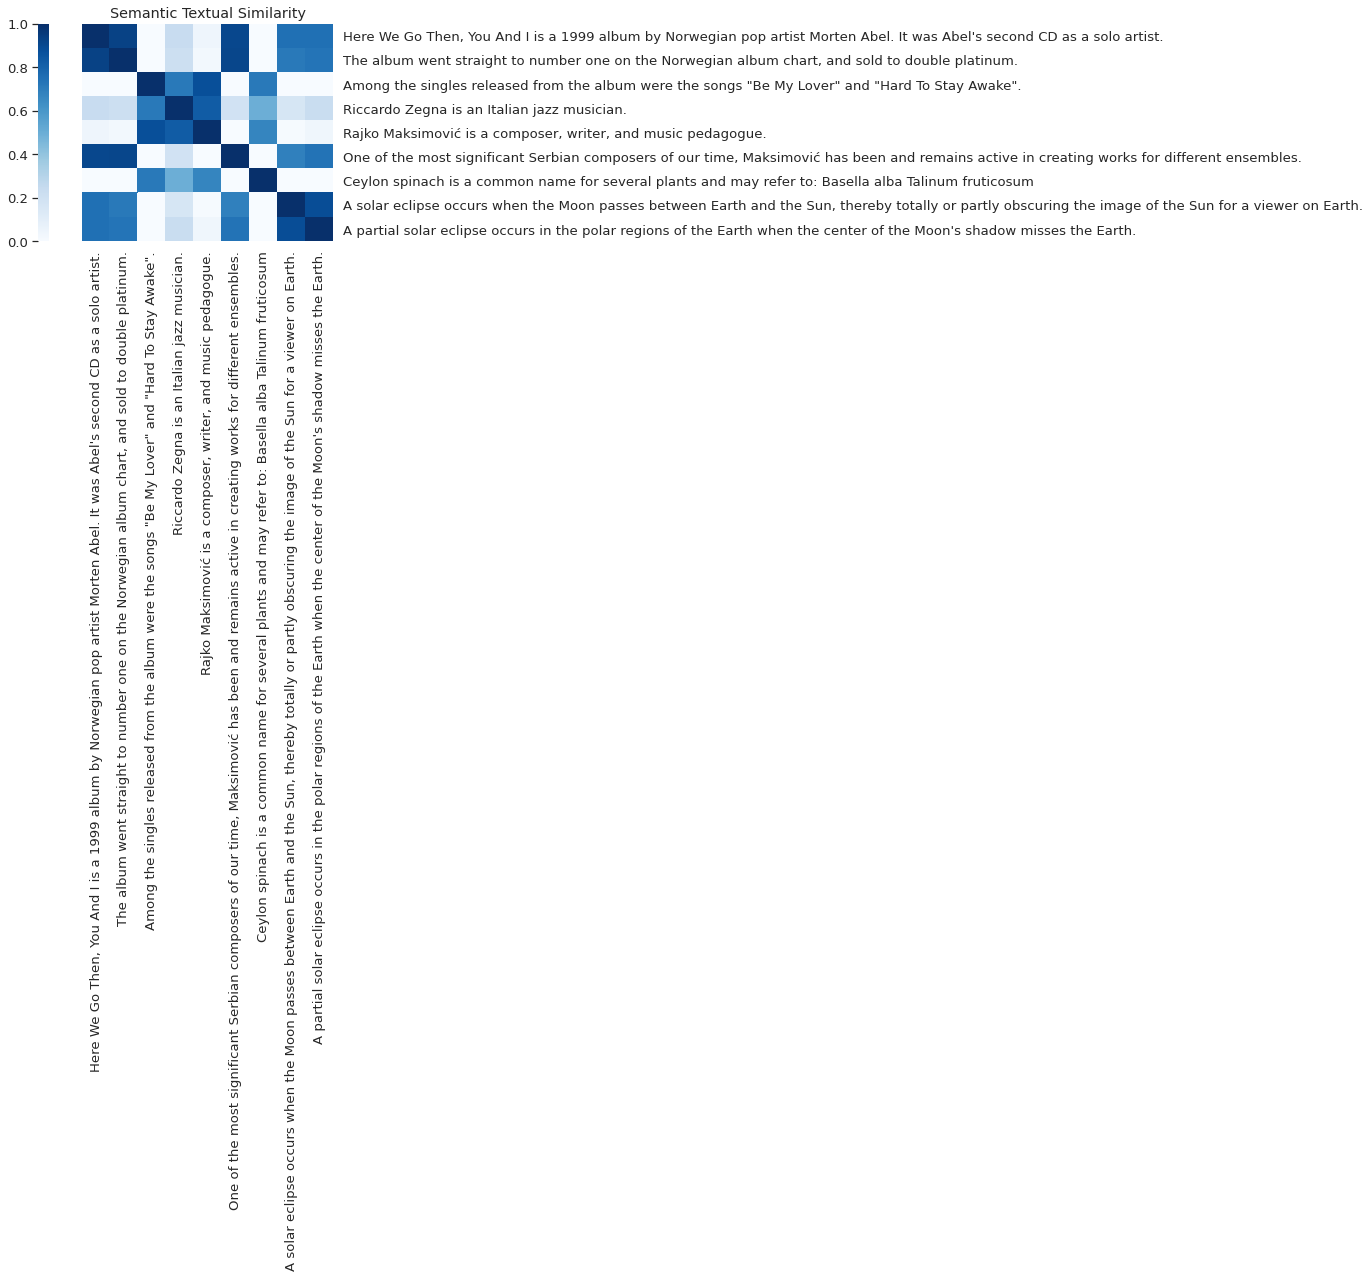

In [7]:
def plot_similarity(features, labels):
  """绘制嵌入物的相似度矩阵。"""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")
    
plot_similarity(outputs["pooled_output"], sentences)

## 了解更多

在 [TensorFlow Hub](https://tfhub.dev) 上找到更多的 BERT 模型。<br>
这个 notebook 演示了使用 BERT 进行简单的推理，你可以在 [tensorflow.org/official_models/fine_tuning_bert](https://www.tensorflow.org/official_models/fine_tuning_bert) 上找到更高级的关于微调 BERT 的教程。<br>
在 [tensorflow.org/tutorials/distribute/save_and_load](https://www.tensorflow.org/tutorials/distribute/save_and_load) 了解更多关于如何使用 tf.distribute 加载模型的信息。